<a href="https://colab.research.google.com/github/NelsonKamau/cyberbullying--data-cleaning-and-CNN-model/blob/main/cyberbullying_data_cleaning_and_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center><u>Cyberbullying data cleaning and CNN model</u></center>**

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import nltk
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from sklearn.model_selection import train_test_split
from nltk.stem.wordnet import WordNetLemmatizer
import re
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding, Flatten, Dense, Conv1D, MaxPool1D, MaxPooling1D
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import Sequential
from sklearn.preprocessing import OrdinalEncoder

## Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/Cyberbullying-Classification/

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/Cyberbullying-Classification


In [ ]:
df = pd.read_csv('cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


## Exploratory data analysis

In [ ]:
pd.DataFrame(df['cyberbullying_type'].unique())

,0
0,not_cyberbullying
1,gender
2,religion
3,other_cyberbullying
4,age
5,ethnicity


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

36
0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47656 non-null  object
 1   cyberbullying_type  47656 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


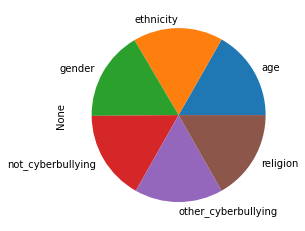

In [ ]:
df.groupby('cyberbullying_type').size().plot(kind='pie');

## Preprocessing the tweets

**tweet-preprocesing:** Preprocessor is a preprocessing library for tweet data written in Python. It was written as part of my bachelor as a part of my bachelor thesis in sentiment analysis. Later I extracted it to a library for broader usage.

When building Machine Learning systems based on tweet data, a preprocessing is required. This library makes it easy to clean, parse or tokenize the tweets.

Currently supports cleaning, tokenizing and parsing:


*   URLs
*   Hashtags
*   Mentions
*   Reserved words (RT, FAV)
*   Emojis
*   Smileys
*   JSON and .txt file support

In [ ]:
!pip3 install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The following line of code does all the aforementioned basic preprocessing required when dealing with tweet dataset.

In [ ]:
import preprocessor as p
# Forming a separate feature for cleaned tweets

def preprocess_tweet(row):
  text = row['tweet_text']
  text = p.clean(text)

  return text

In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df['tweet_text'] = df.apply(preprocess_tweet, axis=1)
df.head()

,tweet_text,cyberbullying_type
0,"In other words , your food was crapilicious!",not_cyberbullying
1,Why is so white?,not_cyberbullying
2,a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"meh. thanks for the heads up, but not too conc...",not_cyberbullying
4,This is an ISIS account pretending to be a Kur...,not_cyberbullying


Now we can see that all the hastags, mentions, emojis, etc in the tweets have been eliminated

## Removing stop words


 

**What are stop words?**

Stop words are basically a set of commonly used words in any language, not just English.

The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead.

**Why do we need to remove stop words?**

Here are a few key benefits of removing stopwords:

* On removing stopwords, dataset size decreases and the time to train the model also decreases.
* Removing stopwords can potentially help improve the performance as there are fewer and only meaningful tokens left. Thus, it could increase classification accuracy.
* Even search engines like Google remove stopwords for fast and relevant retrieval of data from the database.

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

**Stopword Removal using Gensim**

Gensim is a pretty handy library to work with on NLP tasks. While pre-processing, gensim provides methods to remove stopwords as well. We can easily import the remove_stopwords method from the class gensim.parsing.preprocessing.


In [ ]:
def stopword_removal(row):
  text = row['tweet_text']
  text = remove_stopwords(text)

  return text

In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words , your food was crapilicious!",not_cyberbullying
1,Why is so white?,not_cyberbullying
2,a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"meh. thanks for the heads up, but not too conc...",not_cyberbullying
4,This is an ISIS account pretending to be a Kur...,not_cyberbullying


In [ ]:
df['tweet_text'] = df.apply(stopword_removal, axis=1)
df.head()

,tweet_text,cyberbullying_type
0,"In words , food crapilicious!",not_cyberbullying
1,Why white?,not_cyberbullying
2,classy whore? Or red velvet cupcakes?,not_cyberbullying
3,"meh. thanks heads up, concerned angry dude twi...",not_cyberbullying
4,This ISIS account pretending Kurdish account. ...,not_cyberbullying


It is clear that by removing the stop words the important content in the sentence is seen exactly.

**Removing the punctuations and converting the upper case to lower case**

I used regular expression and string replace function.
A regular expression is a sequence of characters that specifies a search pattern in text. Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings.

In [ ]:
df['tweet_text'] = df['tweet_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df.head()

<ipython-input-17-83b1eacb4205>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_text'] = df['tweet_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


,tweet_text,cyberbullying_type
0,in words food crapilicious,not_cyberbullying
1,why white,not_cyberbullying
2,classy whore or red velvet cupcakes,not_cyberbullying
3,meh thanks heads up concerned angry dude twitter,not_cyberbullying
4,this isis account pretending kurdish account l...,not_cyberbullying


## Tokenization


**What is tokenization**

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning.   

**NLTK**

Natural Language toolkit has very important module NLTK tokenize sentences which further comprises of sub-modules

* word tokenize
* sentence tokenize

**Tokenization of words**

We use the method word_tokenize() to split a sentence into words. The output of word tokenization can be converted to Data Frame for better text understanding in machine learning applications. 

In [ ]:
nltk.download('punkt')

def length(text):
    return len(word_tokenize(text))

df['word_count'] = df['tweet_text'].apply(length)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,tweet_text,cyberbullying_type,word_count
0,in words food crapilicious,not_cyberbullying,4
1,why white,not_cyberbullying,2
2,classy whore or red velvet cupcakes,not_cyberbullying,6
3,meh thanks heads up concerned angry dude twitter,not_cyberbullying,8
4,this isis account pretending kurdish account l...,not_cyberbullying,9


In [ ]:
fig = px.histogram(df, x='word_count', color='cyberbullying_type', title='Words in the tweet (including very long tweets)')
fig.show()
px.histogram(df[df.word_count<900], x='word_count', color='cyberbullying_type', title='Words in the tweet (excluding very long tweets)')

**Word cloud**

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

Gender


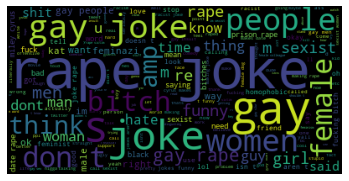

Ethnicity


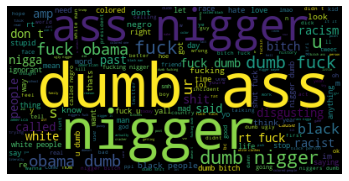

Religion


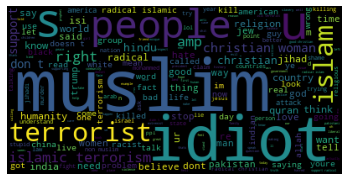

Age


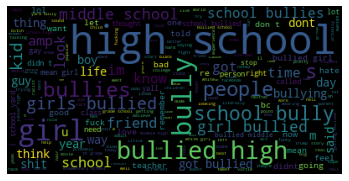

Other


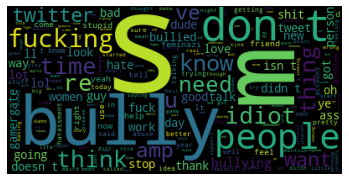

Non-bullying


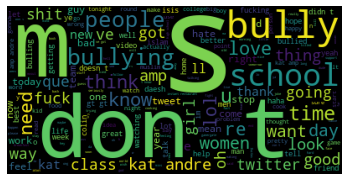

In [ ]:
print('Gender')
text = ' '.join(review for review in df[df.cyberbullying_type=='gender']. tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

print('Ethnicity')
text = ' '.join(review for review in df[df.cyberbullying_type=='ethnicity']. tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

print('Religion')
text = ' '.join(review for review in df[df.cyberbullying_type=='religion']. tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

print('Age')
text = ' '.join(review for review in df[df.cyberbullying_type=='age']. tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

print('Other')
text = ' '.join(review for review in df[df.cyberbullying_type=='other_cyberbullying']. tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

print('Non-bullying')
text = ' '.join(review for review in df[df.cyberbullying_type=='not_cyberbullying']. tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Another method of preprocessing



**Removing the punctuations if present**

In [ ]:
def remove_punct(text):
  # print(text)
  return text.translate(str.maketrans('', '', string.punctuation))

df['no_punctuation'] = df['tweet_text'].apply(remove_punct)
df.head()

,tweet_text,cyberbullying_type,word_count,no_punctuation
0,in words food crapilicious,not_cyberbullying,4,in words food crapilicious
1,why white,not_cyberbullying,2,why white
2,classy whore or red velvet cupcakes,not_cyberbullying,6,classy whore or red velvet cupcakes
3,meh thanks heads up concerned angry dude twitter,not_cyberbullying,8,meh thanks heads up concerned angry dude twitter
4,this isis account pretending kurdish account l...,not_cyberbullying,9,this isis account pretending kurdish account l...


**Converting the uppercase to lowercase and removing punctuations**

In [ ]:
def lower(text):
    return text.lower()
df['no_punctuation'] = df['no_punctuation'].apply(lower)

def remove_stopwords(text):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    new_text = []
    for el in word_tokenize(text):
        if not el in stop_words:
            new_text.append(el)
    return new_text
df['no_stopwords'] = df.no_punctuation.apply(remove_stopwords)
df.head()

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-dat

,tweet_text,cyberbullying_type,word_count,no_punctuation,no_stopwords
0,in words food crapilicious,not_cyberbullying,4,in words food crapilicious,"[words, food, crapilicious]"
1,why white,not_cyberbullying,2,why white,[white]
2,classy whore or red velvet cupcakes,not_cyberbullying,6,classy whore or red velvet cupcakes,"[classy, whore, red, velvet, cupcakes]"
3,meh thanks heads up concerned angry dude twitter,not_cyberbullying,8,meh thanks heads up concerned angry dude twitter,"[meh, thanks, heads, concerned, angry, dude, t..."
4,this isis account pretending kurdish account l...,not_cyberbullying,9,this isis account pretending kurdish account l...,"[isis, account, pretending, kurdish, account, ..."


**Removing the emojis and converting it into words**

In [ ]:
def smile_handle(word_list):
  new_word_list = []
  emoji_pattern = re.compile(r"([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])", flags=re.UNICODE)
  for word in word_list:
    if len(re.findall(emoji_pattern,word))!=0:
      if len(re.findall(emoji_pattern,word))!=len(word):
        new_word_list.append(re.sub(emoji_pattern,'',word))
      new_word_list.extend(re.findall(emoji_pattern,word))
      #print(word,new_word_list)
    else:
      new_word_list.append(word)
  for i,el in enumerate(new_word_list):
    if type(el)==tuple:
      new_word_list[i] = el[1]
  return new_word_list
df.no_stopwords = df.no_stopwords.apply(smile_handle)

**Importing the packages of NLTK for lemmatization**

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**What is Lemmatization in NLP?**

Lemmatization is a text normalization technique used in Natural Language Processing (NLP), that switches any kind of a word to its base root mode. Lemmatization is responsible for grouping different inflected forms of words into the root form, having the same meaning.

![](http://global-uploads.webflow.com/5ef788f07804fb7d78a4127a/61cabe3ac8046f4ca17b01d5_lemmatization.jpeg)

**What is the advantage and disadvantage of Lemmatization?**

The obvious advantage of lemmatization is that it is more accurate. It is useful to get root words from the dictionary, unlike just cutting words like stemming. Lemmatization gives more context to chatbot conversations as it recognizes words based on their exact and contextual meaning. 

On the other hand, lemmatization is a time-consuming and slow process. As it extracts the root words and meaning of the words from the dictionary. So most lemmatization algorithms are slower compared to their stemming counterparts.

In [ ]:
def lemmatize(words):
  nltk.download('wordnet')
  new_words = []
  lem = WordNetLemmatizer()
  for w in words:
    new_words.append(lem.lemmatize(w))
  
  return new_words

df['lemmatized'] = df.no_stopwords.apply(lemmatize)

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading packa

**Counter**

A Counter is a dict subclass for counting hashable objects. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts.

In [ ]:
vocab = Counter()

We will count number of words present in the tweets

In [ ]:
def add_to_vocab(words):
  global vocab
  vocab.update(words)

df.lemmatized.apply(add_to_vocab)
vocab_size = len(vocab)
print(f'Vocabulary size: {vocab_size}')

Vocabulary size: 35011


Wow! The vacabulary size is **35011**.

We are analysing the **top 50 words** used in the tweets.

In [ ]:
vocab.most_common(50)

[('school', 9254),
 ('fuck', 6154),
 ('like', 6026),
 ('nigger', 5720),
 ('girl', 5596),
 ('joke', 5565),
 ('bully', 5393),
 ('dumb', 5378),
 ('high', 5251),
 ('muslim', 4955),
 ('people', 4933),
 ('u', 4818),
 ('bullied', 4691),
 ('gay', 4512),
 ('rape', 4448),
 ('idiot', 3499),
 ('woman', 3279),
 ('black', 2920),
 ('amp', 2830),
 ('as', 2823),
 ('know', 2556),
 ('bitch', 2556),
 ('white', 2356),
 ('think', 2335),
 ('right', 2285),
 ('christian', 2191),
 ('got', 1881),
 ('time', 1830),
 ('im', 1713),
 ('fucking', 1682),
 ('dont', 1656),
 ('want', 1644),
 ('shit', 1553),
 ('thing', 1540),
 ('ur', 1527),
 ('called', 1527),
 ('terrorist', 1465),
 ('year', 1457),
 ('hate', 1416),
 ('need', 1344),
 ('support', 1343),
 ('said', 1318),
 ('look', 1312),
 ('islamic', 1291),
 ('obama', 1256),
 ('good', 1252),
 ('female', 1243),
 ('bullying', 1239),
 ('friend', 1234),
 ('man', 1233)]

Lemmatization is done

In [ ]:
words = [key for key, val in vocab.items() if val >= 3]
vocab_size = len(words)
print(vocab_size)

def remove_rare(text):
  global words
  for el in text:
    if not el in words:
      text.remove(el)

  return text

df.lemmatized = df.lemmatized.apply(remove_rare)


12568


You can see that after lemmatization,the vacabulary size has been reduced.

## Splitting the data into test and train


The **train-test split** procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['lemmatized']], df['cyberbullying_type'])

In [ ]:
vocab = Counter()

def add_to_vocab(words):
  global vocab
  vocab.update(words)

X_train.lemmatized.apply(add_to_vocab)
df.lemmatized.apply(add_to_vocab)
vocab_size = len(vocab)
vocab_size

15103

**Tokenizer**

This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf...

In [ ]:
X_train.head()

,lemmatized
27836,"[hey, toss, info, pas, chain, enforcer, type, ..."
17263,"[palestine, pakistan, center, islamic, terrori..."
26287,"[friend, weev, actual, neo, nazi, harassed, dr..."
6150,"[played, faith, classic]"
44390,"[unhappy, scrappy, rt, fuck, obama, dumb, as, ..."


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.lemmatized)
X_train = tokenizer.texts_to_sequences(X_train.lemmatized)
X_test = tokenizer.texts_to_sequences(X_test.lemmatized)

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
0,218.0,3929.0,1576.0,782.0,2573.0,4799.0,329.0,11.0,2479.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1198.0,273.0,2126.0,41.0,47.0,3167.0,42.0,10.0,492.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46.0,5737.0,718.0,4178.0,952.0,1245.0,3515.0,17.0,3.0,5224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,996.0,719.0,1405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3713.0,10740.0,58.0,2.0,45.0,7.0,19.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
max_size = len(max(df.lemmatized, key=lambda x:len(x)))
max_size

307

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_size, padding='post')

In [ ]:
X_test = pad_sequences(X_test, maxlen=max_size, padding='post')

**Ordinal encoder**

Encode categorical features as an integer array.The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,297,298,299,300,301,302,303,304,305,306
0,218,3929,1576,782,2573,4799,329,11,2479,0,...,0,0,0,0,0,0,0,0,0,0
1,1198,273,2126,41,47,3167,42,10,492,0,...,0,0,0,0,0,0,0,0,0,0
2,46,5737,718,4178,952,1245,3515,17,3,5224,...,0,0,0,0,0,0,0,0,0,0
3,996,719,1405,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3713,10740,58,2,45,7,19,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
enc = OrdinalEncoder()
y_train, y_test = to_categorical(enc.fit_transform(X=y_train.to_frame()), num_classes=6), to_categorical(enc.fit_transform(X=y_test.to_frame()), num_classes=6)

In [ ]:
X_train

array([[  218,  3929,  1576, ...,     0,     0,     0],
       [ 1198,   273,  2126, ...,     0,     0,     0],
       [   46,  5737,   718, ...,     0,     0,     0],
       ...,
       [ 1515, 14418,  3446, ...,     0,     0,     0],
       [ 1561,  6209, 14419, ...,     0,     0,     0],
       [  193,   152,   344, ...,     0,     0,     0]], dtype=int32)

# Training the model

**Convolutional Neural Networks**
Convolutional Neural networks are designed to process data through multiple layers of arrays. This type of neural networks is used in applications like image recognition or face recognition. The primary difference between CNN and any other ordinary neural network is that CNN takes input as a two-dimensional array and operates directly on the images rather than focusing on feature extraction which other neural networks focus on.



**CNN is used to develop a model**

In [ ]:
def define_model(vocab_size, max_length):
  model = Sequential()
  model.add(Embedding(vocab_size, 100, input_length=max_length))
  model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
  model.add(MaxPool1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
  model.add(Dense(6, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model = define_model(vocab_size, max_size)
model.fit(X_train, y_train, epochs=20, verbose=2)

Epoch 1/20
1117/1117 - 45s - loss: 0.6459 - accuracy: 0.7253 - 45s/epoch - 40ms/step
Epoch 2/20
1117/1117 - 44s - loss: 0.3886 - accuracy: 0.8431 - 44s/epoch - 40ms/step
Epoch 3/20
1117/1117 - 43s - loss: 0.3053 - accuracy: 0.8792 - 43s/epoch - 39ms/step
Epoch 4/20
1117/1117 - 43s - loss: 0.2442 - accuracy: 0.9036 - 43s/epoch - 39ms/step
Epoch 5/20
1117/1117 - 43s - loss: 0.1994 - accuracy: 0.9182 - 43s/epoch - 39ms/step
Epoch 6/20
1117/1117 - 43s - loss: 0.1688 - accuracy: 0.9290 - 43s/epoch - 39ms/step
Epoch 7/20
1117/1117 - 43s - loss: 0.1466 - accuracy: 0.9349 - 43s/epoch - 39ms/step
Epoch 8/20
1117/1117 - 43s - loss: 0.1308 - accuracy: 0.9397 - 43s/epoch - 39ms/step
Epoch 9/20
1117/1117 - 43s - loss: 0.1177 - accuracy: 0.9442 - 43s/epoch - 39ms/step
Epoch 10/20
1117/1117 - 43s - loss: 0.1107 - accuracy: 0.9465 - 43s/epoch - 39ms/step
Epoch 11/20
1117/1117 - 43s - loss: 0.1068 - accuracy: 0.9470 - 43s/epoch - 39ms/step
Epoch 12/20
1117/1117 - 43s - loss: 0.0989 - accuracy: 0.9493 -

**Evaluating the model**

In [ ]:
results = model.evaluate(X_test, y_test)
results

373/373 [==============================] - 5s 11ms/step - loss: 1.6412 - accuracy: 0.7674


[1.6411643028259277, 0.7674164772033691]

In [ ]:
from tensorflow.keras.models import save_model
save_model(model, 'model.h5')

**Trying a different model with more layers**

In [ ]:
def define_model2(vocab_size,max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = define_model2(vocab_size, max_size)
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1117/1117 - 54s - loss: 0.6795 - accuracy: 0.7044 - 54s/epoch - 48ms/step
Epoch 2/100
1117/1117 - 74s - loss: 0.4214 - accuracy: 0.8129 - 74s/epoch - 66ms/step
Epoch 3/100
1117/1117 - 62s - loss: 0.3291 - accuracy: 0.8646 - 62s/epoch - 56ms/step
Epoch 4/100
1117/1117 - 53s - loss: 0.2587 - accuracy: 0.8946 - 53s/epoch - 47ms/step
Epoch 5/100
1117/1117 - 54s - loss: 0.2113 - accuracy: 0.9143 - 54s/epoch - 48ms/step
Epoch 6/100
1117/1117 - 54s - loss: 0.1813 - accuracy: 0.9251 - 54s/epoch - 49ms/step
Epoch 7/100
1117/1117 - 52s - loss: 0.1548 - accuracy: 0.9320 - 52s/epoch - 47ms/step
Epoch 8/100
1117/1117 - 52s - loss: 0.1429 - accuracy: 0.9373 - 52s/epoch - 47ms/step
Epoch 9/100
1117/1117 - 53s - loss: 0.1290 - accuracy: 0.9410 - 53s/epoch - 48ms/step
Epoch 10/100
1117/1117 - 52s - loss: 0.1223 - accuracy: 0.9437 - 52s/epoch - 47ms/step
Epoch 11/100
1117/1117 - 52s - loss: 0.1189 - accuracy: 0.9445 - 52s/epoch - 46ms/step
Epoch 12/100
1117/1117 - 52s - loss: 0.1159 - accura

In [ ]:
results = model.evaluate(X_test, y_test)
results

373/373 [==============================] - 5s 12ms/step - loss: 0.6372 - accuracy: 0.7362


[0.6372191309928894, 0.7361927032470703]